In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Loading training and testing datasets
train_data = pd.read_csv(r"C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\17 Support Vector Machines\SalaryData_Train.csv")
test_data = pd.read_csv(r"C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\17 Support Vector Machines\SalaryData_Test.csv")

In [4]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
# Separating features and labels for training data
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']

In [7]:
# Separating features and true labels for testing data
X_test = test_data.drop('Salary', axis=1)
y_true = test_data['Salary']

In [8]:
# Encoding categorical variables using Label Encoding
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

In [9]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initializing the SVM classifier
svm_classifier = SVC(kernel='linear')

In [11]:
# Training the model on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [12]:
# Predicting the labels for the testing data
y_pred = svm_classifier.predict(X_test_scaled)

In [13]:
# Calculating accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8088313413014608


In [14]:
# Generating a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88     11360
        >50K       0.76      0.32      0.45      3700

    accuracy                           0.81     15060
   macro avg       0.79      0.64      0.67     15060
weighted avg       0.80      0.81      0.78     15060



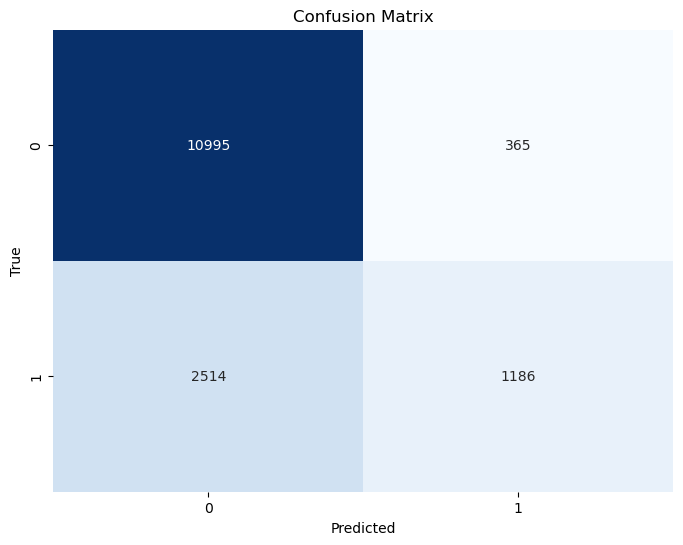

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# True Negative (TN): The number of instances (10995) that were correctly predicted as "<=50K" by the model.
# False Positive (FP): The number of instances (365) that were incorrectly predicted as ">50K" when they were actually "<=50K". These are also known as Type I errors or false alarms.¶
# False Negative (FN): The number of instances (2514) that were incorrectly predicted as "<=50K" when they were actually ">50K". These are also known as Type II errors or misses.
# True Positive (TP): The number of instances (1186) that were correctly predicted as ">50K" by the model.